In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
from fastai.conv_learner import *

In [3]:
PATH = 'data/planet/'

In [4]:
ls {PATH}

__MACOSX/  test-jpg/  test_v2_file_mapping.csv  tmp/  train-jpg/  train_v2.csv


## Multi-label vs Single-label Classification


In [5]:
from fastai.plots import *

In [6]:
def get_lst(path): return glob(f'{path}/*.*')[0]

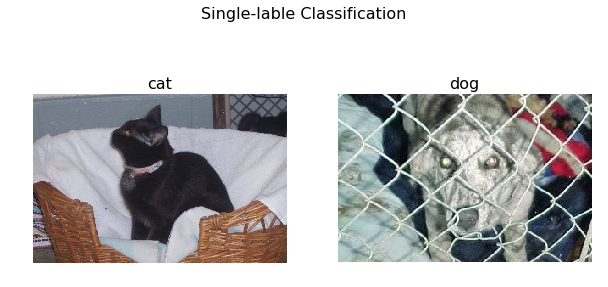

In [7]:
dc_path = 'data/dogscats/valid/'
list_paths = [get_lst(f"{dc_path}cats"), get_lst(f"{dc_path}dogs")]
plots_from_files(list_paths, titles=["cat", "dog"], maintitle="Single-lable Classification")

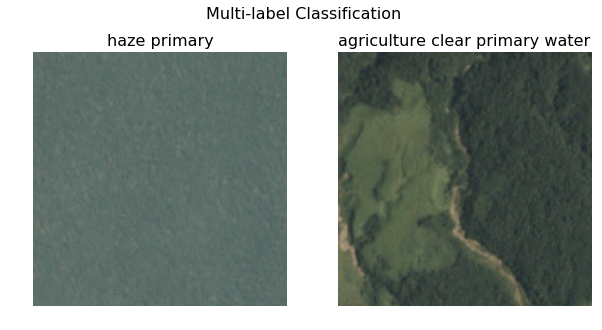

In [8]:
list_paths = [f"{PATH}train-jpg/train_0.jpg", f"{PATH}train-jpg/train_1.jpg"]
titles = ["haze primary", "agriculture clear primary water"]
plots_from_files(list_paths, titles=titles, maintitle="Multi-label Classification")

## Multi-label models for Planet dataset

In [9]:
from planet import f2

In [10]:
metrics=[f2]
f_model = resnet34

In [11]:
label_csv = f"{PATH}train_v2.csv"
n = len(list(open(label_csv)))-1
val_idxs = get_cv_idxs(n)

In [12]:
def get_data(sz):
    tfms = tfms_from_model(f_model, sz, aug_tfms=transforms_top_down, max_zoom=1.05)
    return ImageClassifierData.from_csv(PATH, 'train-jpg', label_csv, tfms=tfms,
                                       suffix='.jpg', val_idxs=val_idxs, test_name='test-jpg')

In [13]:
data = get_data(256)

In [14]:
x, y = next(iter(data.val_dl))

In [15]:
y


    1     0     0  ...      0     0     1
    0     0     0  ...      0     0     0
    1     0     0  ...      0     0     0
       ...          ⋱          ...       
    1     0     0  ...      0     0     1
    0     0     0  ...      0     0     0
    0     0     0  ...      0     0     1
[torch.FloatTensor of size 64x17]

In [16]:
list(zip(data.classes, y[0]))

[('agriculture', 1.0),
 ('artisinal_mine', 0.0),
 ('bare_ground', 0.0),
 ('blooming', 0.0),
 ('blow_down', 0.0),
 ('clear', 1.0),
 ('cloudy', 0.0),
 ('conventional_mine', 0.0),
 ('cultivation', 0.0),
 ('habitation', 0.0),
 ('haze', 0.0),
 ('partly_cloudy', 0.0),
 ('primary', 1.0),
 ('road', 0.0),
 ('selective_logging', 0.0),
 ('slash_burn', 0.0),
 ('water', 1.0)]

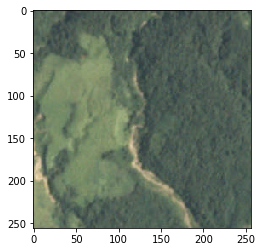

In [17]:
plt.imshow(data.val_ds.denorm(to_np(x))[0]*1.4)

In [18]:
sz=64

In [19]:
data = get_data(sz)

In [20]:
data = data.resize(int(sz*1.3), 'tmp')

HBox(children=(IntProgress(value=0, max=6), HTML(value='')))

In [21]:
learn = ConvLearner.pretrained(f_model, data, metrics=metrics)

HBox(children=(IntProgress(value=0, description='Epoch', max=1), HTML(value='')))

[0.      0.23149 0.38698 0.82859]                            



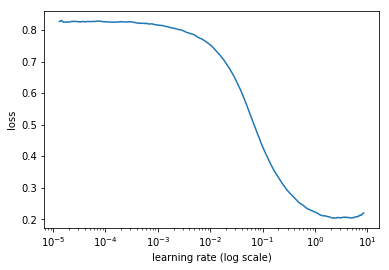

In [22]:
lrf = learn.lr_find()
learn.sched.plot()

In [23]:
lr = 0.2

In [24]:
learn.fit(lr, 3, cycle_len=1, cycle_mult=2)

HBox(children=(IntProgress(value=0, description='Epoch', max=7), HTML(value='')))

[0.      0.14522 0.13619 0.87905]                            
[1.      0.14095 0.13013 0.88372]                            
[2.      0.13582 0.1272  0.88804]                            
[3.      0.13644 0.12886 0.88454]                            
[4.      0.13246 0.1254  0.88931]                            
[5.      0.13226 0.12408 0.89174]                            
[6.      0.12988 0.12413 0.89111]                            



In [25]:
lrs = np.array([lr/9, lr/3, lr])

In [26]:
learn.unfreeze()
learn.fit(lrs, 3, cycle_len=1, cycle_mult=2)

HBox(children=(IntProgress(value=0, description='Epoch', max=7), HTML(value='')))

[0.      0.11534 0.11239 0.90272]                            
[1.      0.11475 0.10806 0.90696]                            
[2.      0.10977 0.10543 0.90945]                            
[3.      0.11062 0.11095 0.89953]                            
[4.      0.10473 0.10398 0.90948]                            
[5.      0.10103 0.10196 0.91203]                             
[6.      0.09578 0.10019 0.91347]                             



In [27]:
learn.save(f'{sz}')

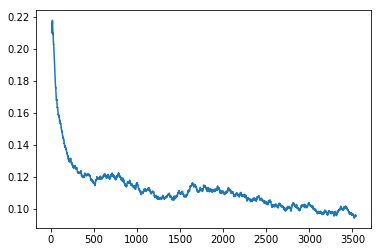

In [28]:
learn.sched.plot_loss()

In [29]:
sz = 128

In [ ]:
learn.set_data(get_data(sz))
learn.freeze()
learn.fit(lr, 3, cycle_len=1, cycle_mult=2)

HBox(children=(IntProgress(value=0, description='Epoch', max=7), HTML(value='')))

[0.      0.09712 0.09975 0.91327]                             
[1.      0.09566 0.09874 0.91463]                             
[2.      0.09784 0.09698 0.91715]                             
[3.      0.09853 0.09758 0.91477]                             
[4.      0.09213 0.0965  0.91696]                             
[5.      0.0941  0.09612 0.91661]                             
[6.      0.09708 0.09642 0.9167 ]                             



In [ ]:
learn.unfreeze()
learn.fit(lrs, 3, cycle_len=1, cycle_mult=2)
learn.save(f'{sz}')

HBox(children=(IntProgress(value=0, description='Epoch', max=7), HTML(value='')))

[0.      0.09251 0.08972 0.92411]                             
[1.      0.09423 0.08931 0.92516]                             
[2.      0.08742 0.08861 0.92435]                             
[3.      0.09372 0.08983 0.9253 ]                             
[4.      0.08483 0.08757 0.92561]                             
[5.      0.08443 0.08617 0.92862]                             


In [ ]:
sz = 256

In [ ]:
learn.set_data(get_data(sz))
learn.freeze()
learn.fit(lr, 3, cycle_len=1, cycle_mult=2)

In [ ]:
learn.unfreeze()
learn.fit(lrs, 3, cycle_len=1, cycle_mult=2)
learn.save(f'{sz}')

In [ ]:
log_preds,y= learn.TTA()
preds = np.mean(np.exp(log_preds),0)

In [ ]:
f2(preds, y)